# HW04 – Multiple Regression and Creating the Real Estate Dataset
### By Donovan Manogue


## Section 3 Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import seaborn as sns
plt.style.use('seaborn-v0_8')

In [ ]:
# importing the libraries needed for this HW.

## Section 4. Import Data

In [5]:
df_realestate =pd.read_csv('data/Real Estate Data - Week 4.csv', index_col=0, header=0)

In [ ]:
#Importing the CSV file needed to do the HW.

## 5. Create the Real Estate Dataset
### Section 5a: Drop features that are not needed

In [7]:
df_realestate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1390 entries, 1 to 1460
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Dwelling Type             1390 non-null   object 
 1   Lot Frontage              1138 non-null   float64
 2   Lot Area                  1390 non-null   int64  
 3   Alley                     83 non-null     object 
 4   Land Contour              1390 non-null   object 
 5   Neighborhood              1390 non-null   object 
 6   Location Condition        1390 non-null   object 
 7   Overall Quality           1390 non-null   int64  
 8   Overall Cond              1390 non-null   int64  
 9   Year Built                1390 non-null   int64  
 10  Masonry/Veneer Area       1382 non-null   float64
 11  Basement Finished Area    1390 non-null   int64  
 12  Basement Unfinished Area  1390 non-null   int64  
 13  Basement Area             1390 non-null   int64  
 14  1st Floor Are

In [8]:
df_realestate=df_realestate.drop('Alley', axis=1)
df_realestate=df_realestate.drop('Garage Yr Built', axis=1)

In [9]:
df_realestate=df_realestate.drop('Basement Area', axis=1)

In [10]:
df_realestate=df_realestate.drop('Year Built', axis=1)

In [11]:
df_realestate

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,...,Garage Finish,Garage Cars,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Sale Condition,Sale Price
Id,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,65.0,8450,Level,College Creek,Normal,7,5,196.0,706,...,Rough Finished,2,0,61,0,0,0,0,Normal Sale,208500
2,1-STORY 1946 & NEWER,80.0,9600,Level,Veenker,Adjacent Feeder St,6,8,0.0,978,...,Rough Finished,2,298,0,0,0,0,0,Normal Sale,181500
3,2-STORY 1946 & NEWER,68.0,11250,Level,College Creek,Normal,7,5,162.0,486,...,Rough Finished,2,0,42,0,0,0,0,Normal Sale,223500
4,2-STORY 1945 & OLDER,60.0,9550,Level,Crawford,Normal,7,5,0.0,216,...,Unfinished,3,0,35,272,0,0,0,"Abnormal Sale - trade, foreclosure, short sale",140000
5,2-STORY 1946 & NEWER,84.0,14260,Level,Northridge,Normal,8,5,350.0,655,...,Rough Finished,3,192,84,0,0,0,0,Normal Sale,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2-STORY 1946 & NEWER,62.0,7917,Level,Gilbert,Normal,6,5,0.0,0,...,Rough Finished,2,0,40,0,0,0,0,Normal Sale,175000
1457,1-STORY 1946 & NEWER,85.0,13175,Level,Northwest Ames,Normal,6,6,119.0,790,...,Unfinished,2,349,0,0,0,0,0,Normal Sale,210000
1458,2-STORY 1945 & OLDER,66.0,9042,Level,Crawford,Normal,7,9,0.0,275,...,Rough Finished,1,0,60,0,0,0,0,Normal Sale,266500


In [12]:
# in this section, I went ahead and dropped 3 columns from our dataframe since they were not needed

### Section 5b: Fill missing values in select features

In [14]:
df_realestate[df_realestate['Lot Frontage'].isnull()]

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,...,Garage Finish,Garage Cars,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Sale Condition,Sale Price
Id,,,,,,,,,,,,,,,,,,,,,
8,2-STORY 1946 & NEWER,NaN,10382,Level,Northwest Ames,Near Pos Feature,7,6,240.0,859,...,Rough Finished,2,235,204,228,0,0,0,Normal Sale,200000
13,1-STORY 1946 & NEWER,NaN,12968,Level,Sawyer,Normal,5,6,0.0,737,...,Unfinished,1,140,0,0,0,176,0,Normal Sale,144000
15,1-STORY 1946 & NEWER,NaN,10920,Level,North Ames,Normal,6,5,212.0,733,...,Rough Finished,1,0,213,176,0,0,0,Normal Sale,157000
17,1-STORY 1946 & NEWER,NaN,11241,Level,North Ames,Normal,6,7,180.0,578,...,Finished,2,0,0,0,0,0,0,Normal Sale,149000
25,1-STORY 1946 & NEWER,NaN,8246,Level,Sawyer,Normal,5,8,0.0,188,...,Unfinished,1,406,90,0,0,0,0,Normal Sale,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,1-STORY 1946 & NEWER,NaN,9503,Level,North Ames,Normal,5,5,0.0,457,...,Unfinished,1,316,28,0,0,0,0,Normal Sale,144000
1430,1-STORY 1946 & NEWER,NaN,12546,Level,Northwest Ames,Normal,6,7,310.0,678,...,Finished,2,0,0,99,0,0,0,Normal Sale,182900
1432,1-STORY PUD,NaN,4928,Level,Northpark Villa,Normal,6,6,0.0,958,...,Rough Finished,2,0,60,0,0,0,0,Normal Sale,143750


In [15]:
df_realestate[['Lot Frontage','Masonry/Veneer Area']] = df_realestate[['Lot Frontage','Masonry/Veneer Area']].fillna(0)
df_realestate.head(1)

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,...,Garage Finish,Garage Cars,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Sale Condition,Sale Price
Id,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,65.0,8450,Level,College Creek,Normal,7,5,196.0,706,...,Rough Finished,2,0,61,0,0,0,0,Normal Sale,208500


### Section 5b: Engineer (Create) new features

In [17]:
df_realestate['Porch_Area'] = df_realestate['Open Porch Area']+ df_realestate['Enclosed Porch Area']+ df_realestate['3 Season Porch Area']+df_realestate['Screen Porch Area']+ df_realestate['Wood Deck Area']

In [18]:
df_realestate

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,...,Garage Cars,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Sale Condition,Sale Price,Porch_Area
Id,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,65.0,8450,Level,College Creek,Normal,7,5,196.0,706,...,2,0,61,0,0,0,0,Normal Sale,208500,61
2,1-STORY 1946 & NEWER,80.0,9600,Level,Veenker,Adjacent Feeder St,6,8,0.0,978,...,2,298,0,0,0,0,0,Normal Sale,181500,298
3,2-STORY 1946 & NEWER,68.0,11250,Level,College Creek,Normal,7,5,162.0,486,...,2,0,42,0,0,0,0,Normal Sale,223500,42
4,2-STORY 1945 & OLDER,60.0,9550,Level,Crawford,Normal,7,5,0.0,216,...,3,0,35,272,0,0,0,"Abnormal Sale - trade, foreclosure, short sale",140000,307
5,2-STORY 1946 & NEWER,84.0,14260,Level,Northridge,Normal,8,5,350.0,655,...,3,192,84,0,0,0,0,Normal Sale,250000,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2-STORY 1946 & NEWER,62.0,7917,Level,Gilbert,Normal,6,5,0.0,0,...,2,0,40,0,0,0,0,Normal Sale,175000,40
1457,1-STORY 1946 & NEWER,85.0,13175,Level,Northwest Ames,Normal,6,6,119.0,790,...,2,349,0,0,0,0,0,Normal Sale,210000,349
1458,2-STORY 1945 & OLDER,66.0,9042,Level,Crawford,Normal,7,9,0.0,275,...,1,0,60,0,0,0,0,Normal Sale,266500,60


In [19]:
df_realestate['Full_Bathrooms'] = df_realestate['Basement Full Baths']+df_realestate['Full Baths Above Grade']

In [20]:
df_realestate

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,...,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Sale Condition,Sale Price,Porch_Area,Full_Bathrooms
Id,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,65.0,8450,Level,College Creek,Normal,7,5,196.0,706,...,0,61,0,0,0,0,Normal Sale,208500,61,3
2,1-STORY 1946 & NEWER,80.0,9600,Level,Veenker,Adjacent Feeder St,6,8,0.0,978,...,298,0,0,0,0,0,Normal Sale,181500,298,2
3,2-STORY 1946 & NEWER,68.0,11250,Level,College Creek,Normal,7,5,162.0,486,...,0,42,0,0,0,0,Normal Sale,223500,42,3
4,2-STORY 1945 & OLDER,60.0,9550,Level,Crawford,Normal,7,5,0.0,216,...,0,35,272,0,0,0,"Abnormal Sale - trade, foreclosure, short sale",140000,307,2
5,2-STORY 1946 & NEWER,84.0,14260,Level,Northridge,Normal,8,5,350.0,655,...,192,84,0,0,0,0,Normal Sale,250000,276,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2-STORY 1946 & NEWER,62.0,7917,Level,Gilbert,Normal,6,5,0.0,0,...,0,40,0,0,0,0,Normal Sale,175000,40,2
1457,1-STORY 1946 & NEWER,85.0,13175,Level,Northwest Ames,Normal,6,6,119.0,790,...,349,0,0,0,0,0,Normal Sale,210000,349,3
1458,2-STORY 1945 & OLDER,66.0,9042,Level,Crawford,Normal,7,9,0.0,275,...,0,60,0,0,0,0,Normal Sale,266500,60,2


In [21]:
df_realestate['Half_Bathrooms']=df_realestate['Basement Half baths']+df_realestate['Half Baths Above Grade']

In [22]:
df_realestate

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,...,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Sale Condition,Sale Price,Porch_Area,Full_Bathrooms,Half_Bathrooms
Id,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,65.0,8450,Level,College Creek,Normal,7,5,196.0,706,...,61,0,0,0,0,Normal Sale,208500,61,3,1
2,1-STORY 1946 & NEWER,80.0,9600,Level,Veenker,Adjacent Feeder St,6,8,0.0,978,...,0,0,0,0,0,Normal Sale,181500,298,2,1
3,2-STORY 1946 & NEWER,68.0,11250,Level,College Creek,Normal,7,5,162.0,486,...,42,0,0,0,0,Normal Sale,223500,42,3,1
4,2-STORY 1945 & OLDER,60.0,9550,Level,Crawford,Normal,7,5,0.0,216,...,35,272,0,0,0,"Abnormal Sale - trade, foreclosure, short sale",140000,307,2,0
5,2-STORY 1946 & NEWER,84.0,14260,Level,Northridge,Normal,8,5,350.0,655,...,84,0,0,0,0,Normal Sale,250000,276,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2-STORY 1946 & NEWER,62.0,7917,Level,Gilbert,Normal,6,5,0.0,0,...,40,0,0,0,0,Normal Sale,175000,40,2,1
1457,1-STORY 1946 & NEWER,85.0,13175,Level,Northwest Ames,Normal,6,6,119.0,790,...,0,0,0,0,0,Normal Sale,210000,349,3,0
1458,2-STORY 1945 & OLDER,66.0,9042,Level,Crawford,Normal,7,9,0.0,275,...,60,0,0,0,0,Normal Sale,266500,60,2,0


In [23]:
section5ColumnDrop=df_realestate[['Open Porch Area','Enclosed Porch Area','3 Season Porch Area','Screen Porch Area','Wood Deck Area','Basement Half baths','Half Baths Above Grade','Full Baths Above Grade','Basement Full Baths']]
df_realestate=df_realestate.drop(columns=section5ColumnDrop, axis=1)
df_realestate

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,...,Total Rooms Above Grade,Fireplaces,Garage Finish,Garage Cars,Pool Area,Sale Condition,Sale Price,Porch_Area,Full_Bathrooms,Half_Bathrooms
Id,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,65.0,8450,Level,College Creek,Normal,7,5,196.0,706,...,8,0,Rough Finished,2,0,Normal Sale,208500,61,3,1
2,1-STORY 1946 & NEWER,80.0,9600,Level,Veenker,Adjacent Feeder St,6,8,0.0,978,...,6,1,Rough Finished,2,0,Normal Sale,181500,298,2,1
3,2-STORY 1946 & NEWER,68.0,11250,Level,College Creek,Normal,7,5,162.0,486,...,6,1,Rough Finished,2,0,Normal Sale,223500,42,3,1
4,2-STORY 1945 & OLDER,60.0,9550,Level,Crawford,Normal,7,5,0.0,216,...,7,1,Unfinished,3,0,"Abnormal Sale - trade, foreclosure, short sale",140000,307,2,0
5,2-STORY 1946 & NEWER,84.0,14260,Level,Northridge,Normal,8,5,350.0,655,...,9,1,Rough Finished,3,0,Normal Sale,250000,276,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2-STORY 1946 & NEWER,62.0,7917,Level,Gilbert,Normal,6,5,0.0,0,...,7,1,Rough Finished,2,0,Normal Sale,175000,40,2,1
1457,1-STORY 1946 & NEWER,85.0,13175,Level,Northwest Ames,Normal,6,6,119.0,790,...,7,2,Unfinished,2,0,Normal Sale,210000,349,3,0
1458,2-STORY 1945 & OLDER,66.0,9042,Level,Crawford,Normal,7,9,0.0,275,...,9,2,Rough Finished,1,0,Normal Sale,266500,60,2,0


In [142]:
# In this section we filled in missinfg values, and got rid of the null values. While creating new featute that mnake more sense for our OLS Model

### Section 5c: Filter df_realestate based on outliers and drop Living Area Above Grade

Text(0.5, 1.0, 'Scatterplot of Living Area Above Grade and Sale Price')

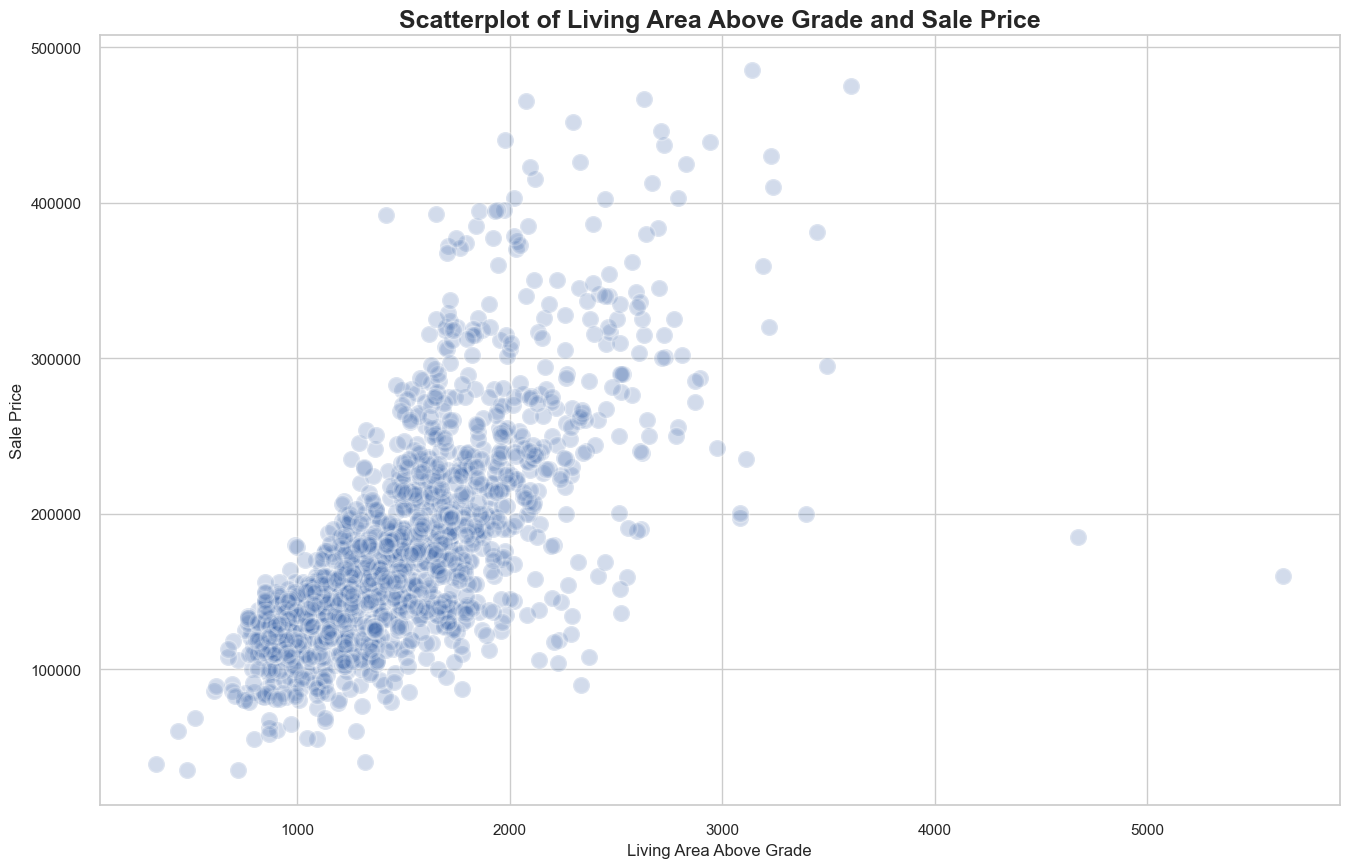

In [25]:
sns.set(style='whitegrid')
plt.figure(figsize=(16,10))
sns.scatterplot(x=df_realestate['Living Area Above Grade'],y= df_realestate['Sale Price'], alpha=.25, data=df_realestate, s=150, edgecolor='white', linewidth=2)
plt.title('Scatterplot of Living Area Above Grade and Sale Price', fontsize='18',fontweight='bold')

In [26]:
df_realestate.count()

Dwelling Type               1390
Lot Frontage                1390
Lot Area                    1390
Land Contour                1390
Neighborhood                1390
Location Condition          1390
Overall Quality             1390
Overall Cond                1390
Masonry/Veneer Area         1390
Basement Finished Area      1390
Basement Unfinished Area    1390
1st Floor Area              1390
2nd Floor Area              1390
Living Area Above Grade     1390
Bedrooms Above Grade        1390
Kitchens Above Grade        1390
Kitchen Qual                1390
Total Rooms Above Grade     1390
Fireplaces                  1390
Garage Finish               1390
Garage Cars                 1390
Pool Area                   1390
Sale Condition              1390
Sale Price                  1390
Porch_Area                  1390
Full_Bathrooms              1390
Half_Bathrooms              1390
dtype: int64

In [27]:
df_realestate['Living Area Above Grade'][df_realestate['Living Area Above Grade']> 4000]

Id
524     4676
1299    5642
Name: Living Area Above Grade, dtype: int64

In [28]:
df_realestate=df_realestate[df_realestate['Living Area Above Grade']<4000]

In [29]:
df_realestate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1388 entries, 1 to 1460
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Dwelling Type             1388 non-null   object 
 1   Lot Frontage              1388 non-null   float64
 2   Lot Area                  1388 non-null   int64  
 3   Land Contour              1388 non-null   object 
 4   Neighborhood              1388 non-null   object 
 5   Location Condition        1388 non-null   object 
 6   Overall Quality           1388 non-null   int64  
 7   Overall Cond              1388 non-null   int64  
 8   Masonry/Veneer Area       1388 non-null   float64
 9   Basement Finished Area    1388 non-null   int64  
 10  Basement Unfinished Area  1388 non-null   int64  
 11  1st Floor Area            1388 non-null   int64  
 12  2nd Floor Area            1388 non-null   int64  
 13  Living Area Above Grade   1388 non-null   int64  
 14  Bedrooms Abov

In [30]:
df_realestate.head()

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,...,Total Rooms Above Grade,Fireplaces,Garage Finish,Garage Cars,Pool Area,Sale Condition,Sale Price,Porch_Area,Full_Bathrooms,Half_Bathrooms
Id,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,65.0,8450,Level,College Creek,Normal,7,5,196.0,706,...,8,0,Rough Finished,2,0,Normal Sale,208500,61,3,1
2,1-STORY 1946 & NEWER,80.0,9600,Level,Veenker,Adjacent Feeder St,6,8,0.0,978,...,6,1,Rough Finished,2,0,Normal Sale,181500,298,2,1
3,2-STORY 1946 & NEWER,68.0,11250,Level,College Creek,Normal,7,5,162.0,486,...,6,1,Rough Finished,2,0,Normal Sale,223500,42,3,1
4,2-STORY 1945 & OLDER,60.0,9550,Level,Crawford,Normal,7,5,0.0,216,...,7,1,Unfinished,3,0,"Abnormal Sale - trade, foreclosure, short sale",140000,307,2,0
5,2-STORY 1946 & NEWER,84.0,14260,Level,Northridge,Normal,8,5,350.0,655,...,9,1,Rough Finished,3,0,Normal Sale,250000,276,3,1


In [31]:
df_realestate[['1st Floor Area','2nd Floor Area','Living Area Above Grade']]

,1st Floor Area,2nd Floor Area,Living Area Above Grade
Id,,,
1,856,854,1710
2,1262,0,1262
3,920,866,1786
4,961,756,1717
5,1145,1053,2198
...,...,...,...
1456,953,694,1647
1457,2073,0,2073
1458,1188,1152,2340


In [32]:
df_realestate=df_realestate.drop(columns='Living Area Above Grade', axis=1)

In [33]:
df_realestate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1388 entries, 1 to 1460
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Dwelling Type             1388 non-null   object 
 1   Lot Frontage              1388 non-null   float64
 2   Lot Area                  1388 non-null   int64  
 3   Land Contour              1388 non-null   object 
 4   Neighborhood              1388 non-null   object 
 5   Location Condition        1388 non-null   object 
 6   Overall Quality           1388 non-null   int64  
 7   Overall Cond              1388 non-null   int64  
 8   Masonry/Veneer Area       1388 non-null   float64
 9   Basement Finished Area    1388 non-null   int64  
 10  Basement Unfinished Area  1388 non-null   int64  
 11  1st Floor Area            1388 non-null   int64  
 12  2nd Floor Area            1388 non-null   int64  
 13  Bedrooms Above Grade      1388 non-null   int64  
 14  Kitchens Abov

In [ ]:
# We filtered out the data to get rid of outliers in the living area above grade column

### Section 5d: Engineer other features specifically for Sale Price

In [35]:
df_realestate['Pool Area']= df_realestate['Pool Area'].fillna(0)
def pool (c):
    if c['Pool Area']== 0:
        return 'No'
    else:
        return 'yes'

df_realestate['Pool']=df_realestate.apply(pool, axis=1)
df_realestate =df_realestate.drop(['Pool Area'], axis=1)

In [36]:
df_realestate['Kitchens Above Grade'].value_counts()

Kitchens Above Grade
1    1329
2      57
3       2
Name: count, dtype: int64

In [37]:
df_realestate['Kitchens Above Grade'][df_realestate['Kitchens Above Grade']<= 1].count()

1329

In [38]:
df_realestate['Extra_Kitchens']=df_realestate['Kitchens Above Grade']-1

In [39]:
df_realestate= df_realestate.drop(['Kitchens Above Grade'], axis=1)


In [40]:
df_realestate.info()
df_realestate.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1388 entries, 1 to 1460
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Dwelling Type             1388 non-null   object 
 1   Lot Frontage              1388 non-null   float64
 2   Lot Area                  1388 non-null   int64  
 3   Land Contour              1388 non-null   object 
 4   Neighborhood              1388 non-null   object 
 5   Location Condition        1388 non-null   object 
 6   Overall Quality           1388 non-null   int64  
 7   Overall Cond              1388 non-null   int64  
 8   Masonry/Veneer Area       1388 non-null   float64
 9   Basement Finished Area    1388 non-null   int64  
 10  Basement Unfinished Area  1388 non-null   int64  
 11  1st Floor Area            1388 non-null   int64  
 12  2nd Floor Area            1388 non-null   int64  
 13  Bedrooms Above Grade      1388 non-null   int64  
 14  Kitchen Qual 

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,...,Fireplaces,Garage Finish,Garage Cars,Sale Condition,Sale Price,Porch_Area,Full_Bathrooms,Half_Bathrooms,Pool,Extra_Kitchens
Id,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,65.0,8450,Level,College Creek,Normal,7,5,196.0,706,...,0,Rough Finished,2,Normal Sale,208500,61,3,1,No,0
2,1-STORY 1946 & NEWER,80.0,9600,Level,Veenker,Adjacent Feeder St,6,8,0.0,978,...,1,Rough Finished,2,Normal Sale,181500,298,2,1,No,0
3,2-STORY 1946 & NEWER,68.0,11250,Level,College Creek,Normal,7,5,162.0,486,...,1,Rough Finished,2,Normal Sale,223500,42,3,1,No,0
4,2-STORY 1945 & OLDER,60.0,9550,Level,Crawford,Normal,7,5,0.0,216,...,1,Unfinished,3,"Abnormal Sale - trade, foreclosure, short sale",140000,307,2,0,No,0
5,2-STORY 1946 & NEWER,84.0,14260,Level,Northridge,Normal,8,5,350.0,655,...,1,Rough Finished,3,Normal Sale,250000,276,3,1,No,0


In [41]:
df_realestate['Total Rooms Above Grade'].value_counts()

Total Rooms Above Grade
6     393
7     324
5     256
8     181
4      84
9      72
10     43
11     15
3      11
12      7
2       1
14      1
Name: count, dtype: int64

In [42]:
df_realestate['Bathroom Percentage']= (df_realestate['Full_Bathrooms'] + df_realestate['Half_Bathrooms'])/df_realestate['Total Rooms Above Grade']

In [43]:
df_realestate

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,...,Garage Finish,Garage Cars,Sale Condition,Sale Price,Porch_Area,Full_Bathrooms,Half_Bathrooms,Pool,Extra_Kitchens,Bathroom Percentage
Id,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,65.0,8450,Level,College Creek,Normal,7,5,196.0,706,...,Rough Finished,2,Normal Sale,208500,61,3,1,No,0,0.500000
2,1-STORY 1946 & NEWER,80.0,9600,Level,Veenker,Adjacent Feeder St,6,8,0.0,978,...,Rough Finished,2,Normal Sale,181500,298,2,1,No,0,0.500000
3,2-STORY 1946 & NEWER,68.0,11250,Level,College Creek,Normal,7,5,162.0,486,...,Rough Finished,2,Normal Sale,223500,42,3,1,No,0,0.666667
4,2-STORY 1945 & OLDER,60.0,9550,Level,Crawford,Normal,7,5,0.0,216,...,Unfinished,3,"Abnormal Sale - trade, foreclosure, short sale",140000,307,2,0,No,0,0.285714
5,2-STORY 1946 & NEWER,84.0,14260,Level,Northridge,Normal,8,5,350.0,655,...,Rough Finished,3,Normal Sale,250000,276,3,1,No,0,0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2-STORY 1946 & NEWER,62.0,7917,Level,Gilbert,Normal,6,5,0.0,0,...,Rough Finished,2,Normal Sale,175000,40,2,1,No,0,0.428571
1457,1-STORY 1946 & NEWER,85.0,13175,Level,Northwest Ames,Normal,6,6,119.0,790,...,Unfinished,2,Normal Sale,210000,349,3,0,No,0,0.428571
1458,2-STORY 1945 & OLDER,66.0,9042,Level,Crawford,Normal,7,9,0.0,275,...,Rough Finished,1,Normal Sale,266500,60,2,0,No,0,0.222222


In [44]:
df_realestate['Bedrooms Above Grade'].value_counts()

Bedrooms Above Grade
3    788
2    326
4    201
1     41
5     20
6      6
0      5
8      1
Name: count, dtype: int64

In [45]:
def bedBathFunc(c):
    if c['Bedrooms Above Grade']== 0:
        return 0
    else:
        return c['Full_Bathrooms']/c['Bedrooms Above Grade']

df_realestate['Baths Per Bedroom']=df_realestate.apply(bedBathFunc, axis=1)

In [46]:
df_realestate

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,...,Garage Cars,Sale Condition,Sale Price,Porch_Area,Full_Bathrooms,Half_Bathrooms,Pool,Extra_Kitchens,Bathroom Percentage,Baths Per Bedroom
Id,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,65.0,8450,Level,College Creek,Normal,7,5,196.0,706,...,2,Normal Sale,208500,61,3,1,No,0,0.500000,1.000000
2,1-STORY 1946 & NEWER,80.0,9600,Level,Veenker,Adjacent Feeder St,6,8,0.0,978,...,2,Normal Sale,181500,298,2,1,No,0,0.500000,0.666667
3,2-STORY 1946 & NEWER,68.0,11250,Level,College Creek,Normal,7,5,162.0,486,...,2,Normal Sale,223500,42,3,1,No,0,0.666667,1.000000
4,2-STORY 1945 & OLDER,60.0,9550,Level,Crawford,Normal,7,5,0.0,216,...,3,"Abnormal Sale - trade, foreclosure, short sale",140000,307,2,0,No,0,0.285714,0.666667
5,2-STORY 1946 & NEWER,84.0,14260,Level,Northridge,Normal,8,5,350.0,655,...,3,Normal Sale,250000,276,3,1,No,0,0.444444,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2-STORY 1946 & NEWER,62.0,7917,Level,Gilbert,Normal,6,5,0.0,0,...,2,Normal Sale,175000,40,2,1,No,0,0.428571,0.666667
1457,1-STORY 1946 & NEWER,85.0,13175,Level,Northwest Ames,Normal,6,6,119.0,790,...,2,Normal Sale,210000,349,3,0,No,0,0.428571,1.000000
1458,2-STORY 1945 & OLDER,66.0,9042,Level,Crawford,Normal,7,9,0.0,275,...,1,Normal Sale,266500,60,2,0,No,0,0.222222,0.500000


In [144]:
# We created some functions to help explain more of the target variable and make it make more sense

## 6. Multiple Regression for ‘Sale Price’
### Section 6a: Creating the X and y datasets

In [48]:
df_realestate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1388 entries, 1 to 1460
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Dwelling Type             1388 non-null   object 
 1   Lot Frontage              1388 non-null   float64
 2   Lot Area                  1388 non-null   int64  
 3   Land Contour              1388 non-null   object 
 4   Neighborhood              1388 non-null   object 
 5   Location Condition        1388 non-null   object 
 6   Overall Quality           1388 non-null   int64  
 7   Overall Cond              1388 non-null   int64  
 8   Masonry/Veneer Area       1388 non-null   float64
 9   Basement Finished Area    1388 non-null   int64  
 10  Basement Unfinished Area  1388 non-null   int64  
 11  1st Floor Area            1388 non-null   int64  
 12  2nd Floor Area            1388 non-null   int64  
 13  Bedrooms Above Grade      1388 non-null   int64  
 14  Kitchen Qual 

In [ ]:
X=df_realestate[['Lot Frontage', 'Lot Area', 'Overall Quality', 'Overall Cond','Masonry/Veneer Area', 'Basement Finished Area', 'Basement Unfinished Area', '1st Floor Area', '2nd Floor Area', 'Bedrooms Above Grade', 'Total Rooms Above Grade', 'Fireplaces', 'Garage Cars', 'Porch_Area', 'Full_Bathrooms', 'Half_Bathrooms', 'Extra_Kitchens', 'Bathroom Percentage', 'Baths Per Bedroom']]
y=df_realestate['Sale Price']

In [147]:
# Used this section to creat the X and Y values for our multiple regression model

### Section 6b: Create a Multiple Regression Model

In [49]:

X=sm.add_constant(X)

reg= sm.OLS(y, X).fit()

pred=reg.predict(X)

resid=reg.resid
                 
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     434.0
Date:                Sun, 22 Sep 2024   Prob (F-statistic):               0.00
Time:                        20:19:22   Log-Likelihood:                -16132.
No. Observations:                1388   AIC:                         3.230e+04
Df Residuals:                    1368   BIC:                         3.241e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -8.709e+04   1.05e+04     -8.286      0.000   -1.08e+05   -6.65e+04
Lot Frontage                82.6625     22.548      3.666      0.000      38.431     126.894
Lot Area                     0.5276      0.079      6.694      0.000       0.373       0.682
Overall Quality           1.879e+04    882.704     21.285      0.000    1.71e+04    2.05e+04
Overall Cond              3278.6962    703.488      4.661      0.000    1898.664    4658.729
Masonry/Veneer Area         21.7737      4.759      4.575      0.000      12.438      31.109
Basement Finished Area      33.6315      3.213     10.467      0.000      27.329      39.934
Basement Unfinished Area    17.7515      2.948      6.022      0.000      11.969      23.534
1st Floor Area              56.4215      4.286     13.164      0.000      48.014      64.830
2nd Floor Area              44.2272      3.666     12.065      0.000      37.036      51.418
Bedrooms Above Grade     -8993.2820   1800.340     -4.995      0.000   -1.25e+04   -5461.556
Total Rooms Above Grade    140.5846   1721.048      0.082      0.935   -3235.595    3516.764
Fireplaces                 579.3308   1380.954      0.420      0.675   -2129.685    3288.347
Garage Cars                 1.2e+04   1389.613      8.632      0.000    9269.510    1.47e+04
Porch_Area                  21.0738      5.212      4.044      0.000      10.850      31.298
Full_Bathrooms            1.443e+04   3850.933      3.748      0.000    6877.182     2.2e+04
Half_Bathrooms            1.149e+04   4034.468      2.848      0.004    3576.532    1.94e+04
Extra_Kitchens           -2.837e+04   4024.665     -7.048      0.000   -3.63e+04   -2.05e+04
Bathroom Percentage      -4.742e+04   2.35e+04     -2.021      0.043   -9.34e+04   -1394.156
Baths Per Bedroom         1655.5818   4356.216      0.380      0.704   -6890.006    1.02e+04
==============================================================================
Omnibus:                      116.041   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              425.173
Skew:                           0.341   Prob(JB):                     4.73e-93
Kurtosis:                       5.624   Cond. No.                     5.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

When looking at this model the model is significant as it shows a 85.6% correlation, showing that this is a strong relationship.
Looking at some of the features there are three features that are not significant as we see a p value that is above 0.05 and those do not contribute to the dependent variable. Those being Baths per Bedroom, Total Rooms above Grade, and Fire Places.
I would say this model is significant, but there are definitely some features we might want to remove.

In [149]:
# We looked at the Regression model and explaoined the results

### Section 6c: Analyze and Visualize the Multiple Regression Results

<Figure size 500x800 with 0 Axes>

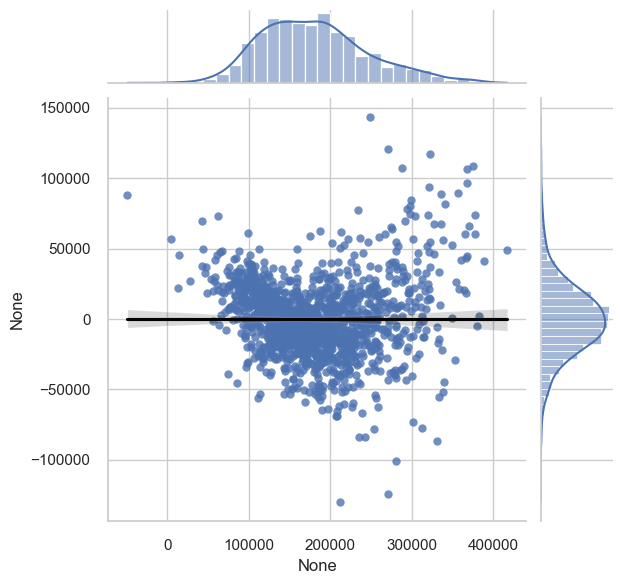

In [52]:
sns.set(style='whitegrid')
plt.figure(figsize=(5,8))
sns.jointplot(x=pred,y=resid, kind='reg',line_kws={'color':'black'})


In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
0,207.5,const
18,18.5,Bathroom Percentage
15,14.4,Full_Bathrooms
11,13.6,Total Rooms Above Grade
16,9.3,Half_Bathrooms
19,4.9,Baths Per Bedroom
9,4.7,2nd Floor Area
8,4.6,1st Floor Area
10,3.8,Bedrooms Above Grade
6,3.5,Basement Finished Area


In [54]:
df_reg=X
df_reg=df_reg.drop(['const'], axis=1)

In [55]:
corrMatrix = df_reg.corr()
df_corrMatrix = pd.DataFrame(corrMatrix)
df_corrMatrix

,Lot Frontage,Lot Area,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Bedrooms Above Grade,Total Rooms Above Grade,Fireplaces,Garage Cars,Porch_Area,Full_Bathrooms,Half_Bathrooms,Extra_Kitchens,Bathroom Percentage,Baths Per Bedroom
Lot Frontage,1.000000,0.067751,0.141235,-0.045103,0.067920,-0.001184,0.150103,0.187686,0.009021,0.131304,0.185239,0.007293,0.156997,0.019388,0.068549,-0.046807,0.036181,-0.123419,-0.068099
Lot Area,0.067751,1.000000,0.067412,0.003510,0.051222,0.158842,-0.008217,0.252236,0.016099,0.106571,0.150562,0.250725,0.128768,0.152109,0.182110,0.010098,-0.013095,0.046206,0.045641
Overall Quality,0.141235,0.067412,1.000000,-0.113376,0.380569,0.186495,0.304033,0.439671,0.264825,0.069187,0.394008,0.372822,0.607380,0.279323,0.482996,0.210203,-0.178554,0.283134,0.330875
Overall Cond,-0.045103,0.003510,-0.113376,1.000000,-0.129069,-0.042947,-0.152377,-0.147896,0.029169,0.017937,-0.047856,-0.027330,-0.204946,0.036754,-0.187816,-0.010481,-0.083233,-0.134430,-0.157524
Masonry/Veneer Area,0.067920,0.051222,0.380569,-0.129069,1.000000,0.202601,0.118342,0.284132,0.137805,0.086027,0.232293,0.223042,0.349082,0.132621,0.226962,0.164857,-0.040737,0.138422,0.125433
Basement Finished Area,-0.001184,0.158842,0.186495,-0.042947,0.202601,1.000000,-0.540269,0.365034,-0.203869,-0.136848,-0.038753,0.224311,0.207985,0.173460,0.481645,-0.000281,-0.087521,0.429796,0.456041
Basement Unfinished Area,0.150103,-0.008217,0.304033,-0.152377,0.118342,-0.540269,1.000000,0.338537,-0.011747,0.153578,0.251633,0.039520,0.213704,0.036632,-0.077029,-0.092532,0.047756,-0.293567,-0.155557
1st Floor Area,0.187686,0.252236,0.439671,-0.147896,0.284132,0.365034,0.338537,1.000000,-0.288005,0.108387,0.359465,0.378189,0.427791,0.265856,0.435150,-0.165788,0.077274,0.028040,0.275283
2nd Floor Area,0.009021,0.016099,0.264825,0.029169,0.137805,-0.203869,-0.011747,-0.288005,1.000000,0.491091,0.607139,0.178409,0.159249,0.162448,0.167274,0.537438,0.065895,0.080800,-0.175708
Bedrooms Above Grade,0.131304,0.106571,0.069187,0.017937,0.086027,-0.136848,0.153578,0.108387,0.491091,1.000000,0.676672,0.096137,0.052357,0.074065,0.153113,0.197537,0.218126,-0.207617,-0.493249


<Axes: >

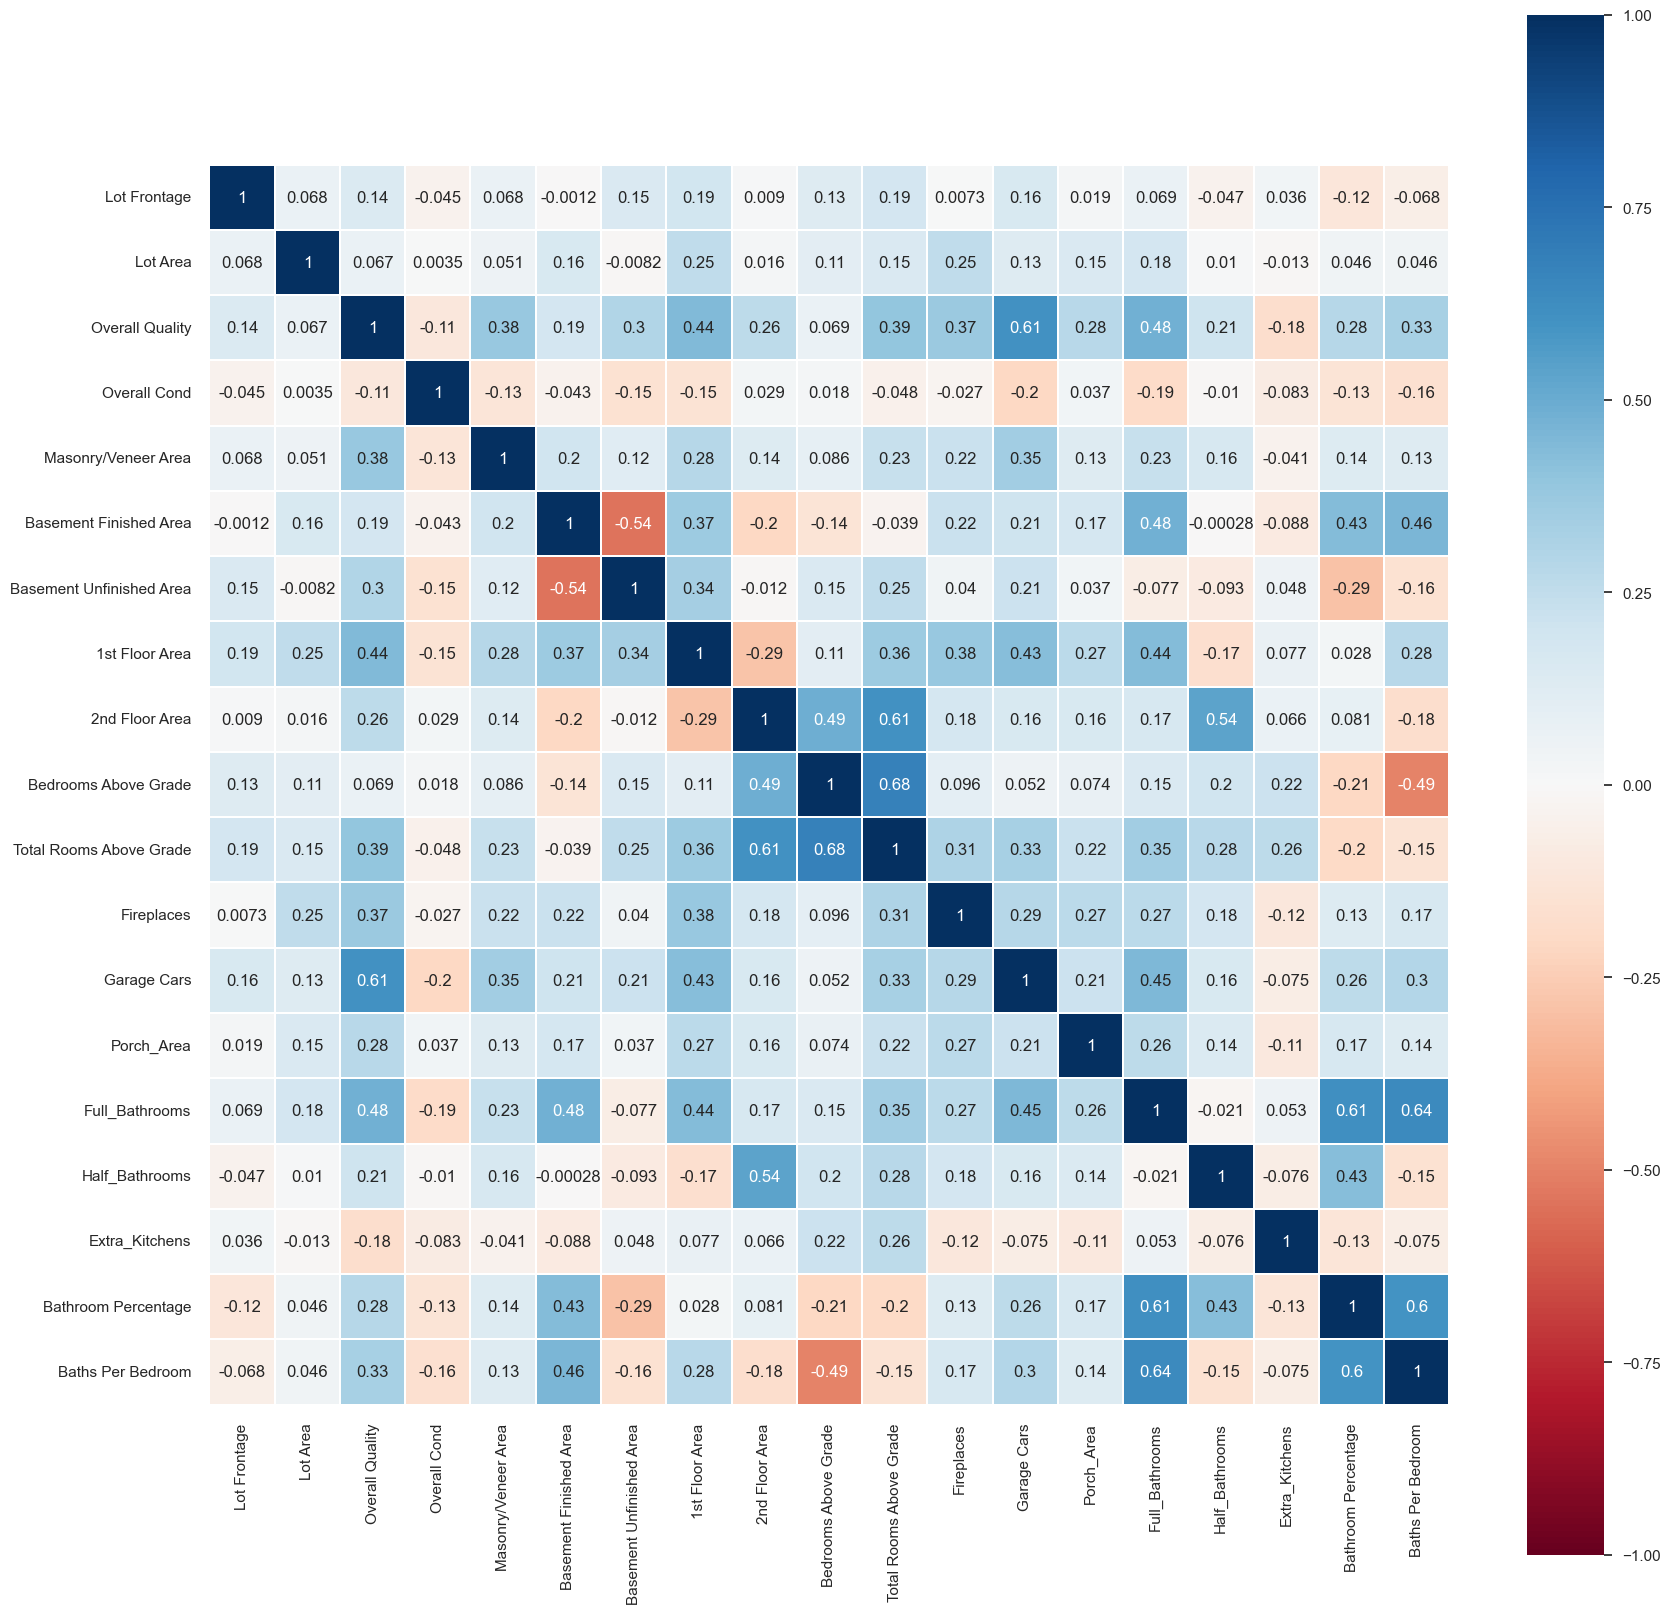

In [56]:
colormap= plt.cm.RdBu
plt.figure(figsize=(20,20))
sns.heatmap(df_corrMatrix, linewidths=0.1, vmax=1.0, vmin=-1.0, square=True, cmap=colormap, linecolor='white',annot=True)

After running the joint plot, the VIF, and the heatmap it looks like there are some features that have multi-colinearity. We should eleminate one of these four features based on the VIF, 
Bathroom Percentage	14.4	Full_Bathrooms	13.6	Total Rooms Above Grade	9.3	Half_Bathrooms.
Based on the Heat map there are some features that have a significant relationship with each other, but not enough for us to elimiate them. Garage Cars to Overall Quality, Half_bathrooms to 2nd floor area and Bathroom above grade to total rooms above grade.


In [ ]:
# in this section we analyzed and visualized the mutltiple regression results, VIF, Residual Plots, and Correlation Matrix/Heatmap

### Section 6d: Re-run a Multiple Regression model after removing the highest VIF feature

In [127]:
X2=df_realestate[['Lot Frontage', 'Lot Area', 'Overall Quality', 'Overall Cond','Masonry/Veneer Area', 'Basement Finished Area', 'Basement Unfinished Area', '1st Floor Area', '2nd Floor Area', 'Bedrooms Above Grade', 'Total Rooms Above Grade', 'Fireplaces', 'Garage Cars', 'Porch_Area', 'Full_Bathrooms', 'Half_Bathrooms', 'Extra_Kitchens', 'Baths Per Bedroom']]
y=df_realestate['Sale Price']
X2=sm.add_constant(X2)

reg2= sm.OLS(y, X2).fit()

pred=reg2.predict(X2)

resid=reg2.resid
                 
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     456.8
Date:                Sun, 22 Sep 2024   Prob (F-statistic):               0.00
Time:                        20:20:58   Log-Likelihood:                -16134.
No. Observations:                1388   AIC:                         3.231e+04
Df Residuals:                    1369   BIC:                         3.240e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.024e+05   7302.619    -14.021      0.000   -1.17e+05   -8.81e+04
Lot Frontage                86.5056     22.493      3.846      0.000      42.382     130.629
Lot Area                     0.5317      0.079      6.742      0.000       0.377       0.686
Overall Quality           1.873e+04    883.145     21.203      0.000     1.7e+04    2.05e+04
Overall Cond              3229.7178    703.862      4.589      0.000    1848.952    4610.484
Masonry/Veneer Area         21.9260      4.764      4.603      0.000      12.581      31.271
Basement Finished Area      34.0312      3.211     10.600      0.000      27.733      40.329
Basement Unfinished Area    17.9400      2.950      6.082      0.000      12.154      23.726
1st Floor Area              55.9449      4.284     13.058      0.000      47.540      64.350
2nd Floor Area              43.9217      3.667     11.979      0.000      36.729      51.115
Bedrooms Above Grade     -9671.7007   1770.763     -5.462      0.000   -1.31e+04   -6197.997
Total Rooms Above Grade   2982.8863    993.255      3.003      0.003    1034.420    4931.352
Fireplaces                 693.8779   1381.344      0.502      0.616   -2015.902    3403.658
Garage Cars               1.197e+04   1391.140      8.608      0.000    9245.646    1.47e+04
Porch_Area                  20.8045      5.216      3.989      0.000      10.573      31.036
Full_Bathrooms            7895.1929   2092.997      3.772      0.000    3789.364     1.2e+04
Half_Bathrooms            4089.1223   1694.540      2.413      0.016     764.946    7413.298
Extra_Kitchens           -3.019e+04   3927.042     -7.687      0.000   -3.79e+04   -2.25e+04
Baths Per Bedroom        -1236.1488   4119.189     -0.300      0.764   -9316.755    6844.457
==============================================================================
Omnibus:                      114.413   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.985
Skew:                           0.345   Prob(JB):                     4.21e-89
Kurtosis:                       5.561   Cond. No.                     1.53e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif["features"] = X2.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
0,99.9,const
9,4.7,2nd Floor Area
8,4.6,1st Floor Area
11,4.5,Total Rooms Above Grade
18,4.4,Baths Per Bedroom
15,4.2,Full_Bathrooms
10,3.7,Bedrooms Above Grade
6,3.5,Basement Finished Area
7,3.2,Basement Unfinished Area
3,2.6,Overall Quality


In [135]:
df_reg2=X
corrMatrix2 = df_reg2.corr()
df_corrMatrix2 = pd.DataFrame(corrMatrix2)
df_corrMatrix2



,const,Lot Frontage,Lot Area,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Bedrooms Above Grade,Total Rooms Above Grade,Fireplaces,Garage Cars,Porch_Area,Full_Bathrooms,Half_Bathrooms,Extra_Kitchens,Baths Per Bedroom
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Frontage,NaN,1.000000,0.067751,0.141235,-0.045103,0.067920,-0.001184,0.150103,0.187686,0.009021,0.131304,0.185239,0.007293,0.156997,0.019388,0.068549,-0.046807,0.036181,-0.068099
Lot Area,NaN,0.067751,1.000000,0.067412,0.003510,0.051222,0.158842,-0.008217,0.252236,0.016099,0.106571,0.150562,0.250725,0.128768,0.152109,0.182110,0.010098,-0.013095,0.045641
Overall Quality,NaN,0.141235,0.067412,1.000000,-0.113376,0.380569,0.186495,0.304033,0.439671,0.264825,0.069187,0.394008,0.372822,0.607380,0.279323,0.482996,0.210203,-0.178554,0.330875
Overall Cond,NaN,-0.045103,0.003510,-0.113376,1.000000,-0.129069,-0.042947,-0.152377,-0.147896,0.029169,0.017937,-0.047856,-0.027330,-0.204946,0.036754,-0.187816,-0.010481,-0.083233,-0.157524
Masonry/Veneer Area,NaN,0.067920,0.051222,0.380569,-0.129069,1.000000,0.202601,0.118342,0.284132,0.137805,0.086027,0.232293,0.223042,0.349082,0.132621,0.226962,0.164857,-0.040737,0.125433
Basement Finished Area,NaN,-0.001184,0.158842,0.186495,-0.042947,0.202601,1.000000,-0.540269,0.365034,-0.203869,-0.136848,-0.038753,0.224311,0.207985,0.173460,0.481645,-0.000281,-0.087521,0.456041
Basement Unfinished Area,NaN,0.150103,-0.008217,0.304033,-0.152377,0.118342,-0.540269,1.000000,0.338537,-0.011747,0.153578,0.251633,0.039520,0.213704,0.036632,-0.077029,-0.092532,0.047756,-0.155557
1st Floor Area,NaN,0.187686,0.252236,0.439671,-0.147896,0.284132,0.365034,0.338537,1.000000,-0.288005,0.108387,0.359465,0.378189,0.427791,0.265856,0.435150,-0.165788,0.077274,0.275283
2nd Floor Area,NaN,0.009021,0.016099,0.264825,0.029169,0.137805,-0.203869,-0.011747,-0.288005,1.000000,0.491091,0.607139,0.178409,0.159249,0.162448,0.167274,0.537438,0.065895,-0.175708


<Axes: >

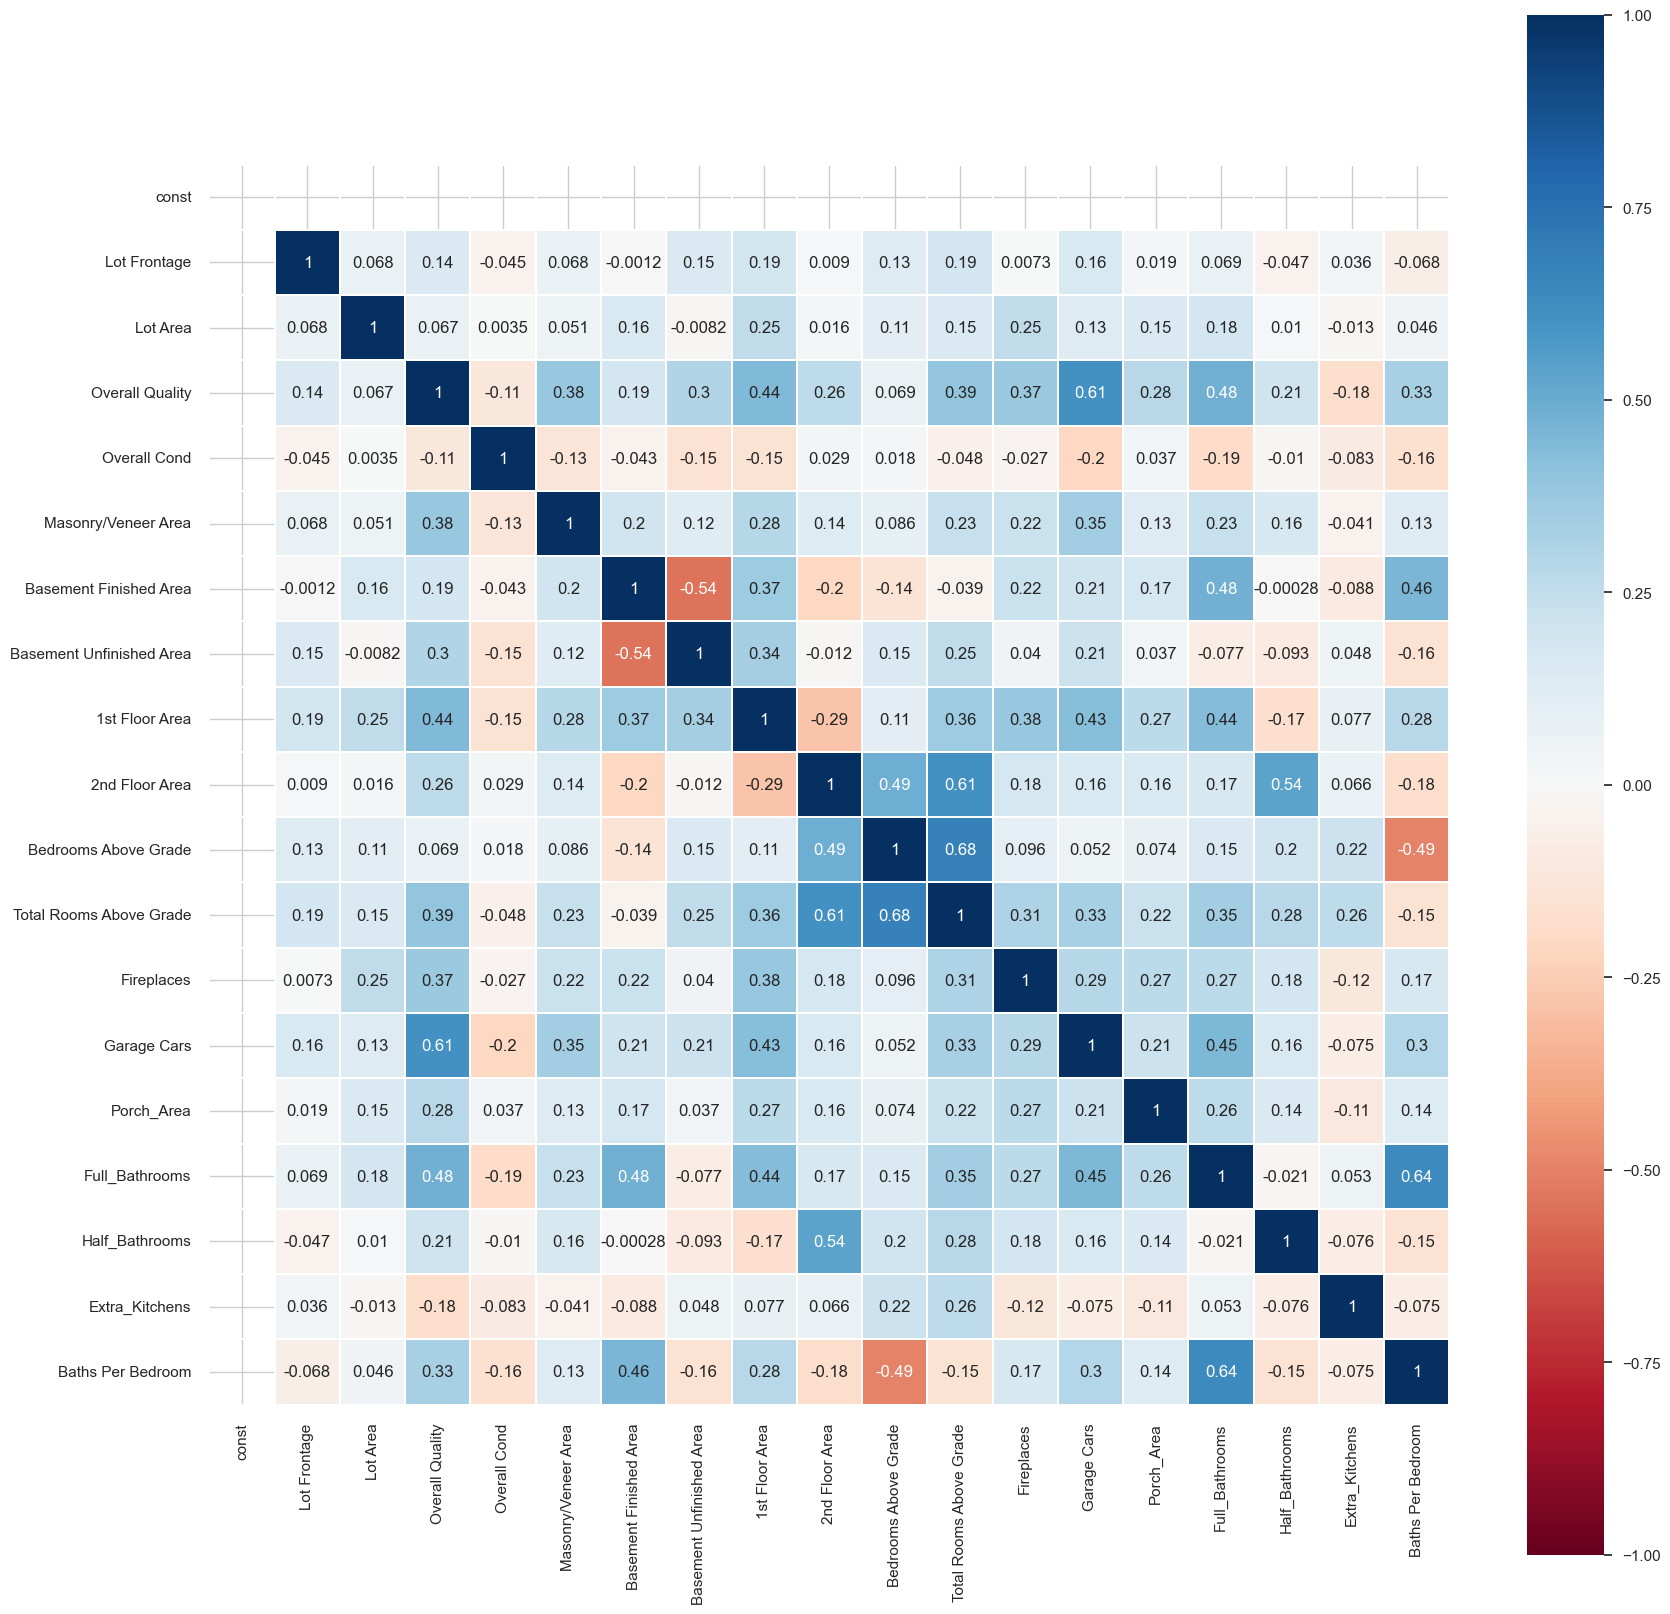

In [137]:
colormap= plt.cm.RdBu
plt.figure(figsize=(20,20))
sns.heatmap(df_corrMatrix2, linewidths=0.1, vmax=1.0, vmin=-1.0, square=True, cmap=colormap, linecolor='white',annot=True)

When looking at the results the R^2 specifically it looks like the model dropped 0.01%. I will say there isn't a massive strenght difference, but we did clean up the multicollinearity, and we are now at acceptable levels. I think this is a good strong model to explain the dependent variable. It is a much stronger model than models we have been working on before.

In [151]:
#Reran our modelm and removed the VIF feature that was the highest, making out MC acceptable for the other features

## 7. Summary and Explanation of All Steps

The rationale when it comes to delteting and creating features is to make a stronger model to create a stronger prediction and correlation between the independent variables (Features) and the dependent variable (Target Variable). In the original model it looked to have a strong correlation between each other and explaining 85.6% (r^2 amount) of all the target variables values. The problem was the p value on some of the features and the multi-colineartiy values being high in some features as well. The plots and the VIF helped me assess multt-colinearity and making sure that we have features that add value to the model and aren't repeats that won't strengthen the model by much of anything. The relationship in the new model is .1% lower (r^2 amount),  but we took away a feature that was strengthening the model with repeat data and the less variables to tell the story/ prediction the better. This model is better than the last model even if it represents slightly less of the values, but it tells the story more accurately. In real terms this would mean that the Sale Price of the home is responsible for 85.5% of all the feature variables, meaning that 14.65 of the sale price is being determined by another variable or by a variable possibly not in our data set.

In [153]:
#The summary of the HW and an explanation of all the steps